# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" +  city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | morbegno
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | beni suef
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | guatire
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | fulacunda
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | severodvinsk
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | kyabe
Processing Record 18 of Set 1 | saleaula
City not found. Skipping...
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | 

Processing Record 37 of Set 4 | kencong
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | praia
Processing Record 40 of Set 4 | tiarei
Processing Record 41 of Set 4 | winton
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | invermere
Processing Record 44 of Set 4 | umm kaddadah
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | atar
Processing Record 48 of Set 4 | kawai
Processing Record 49 of Set 4 | moyale
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | guangyuan
Processing Record 2 of Set 5 | muisne
Processing Record 3 of Set 5 | oriximina
Processing Record 4 of Set 5 | ashtian
Processing Record 5 of Set 5 | marsh harbour
Processing Record 6 of Set 5 | gushikawa
Processing Record 7 of Set 5 | sioux lookout
Processing Record 8 of Set 5 | pangai
Processing Record 9 of Set 5 | ballina
Processing Record 10 of Set 5 | umm l

Processing Record 31 of Set 8 | belmonte
Processing Record 32 of Set 8 | zalantun
Processing Record 33 of Set 8 | zaltan
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | veraval
Processing Record 37 of Set 8 | samarai
Processing Record 38 of Set 8 | kirakira
Processing Record 39 of Set 8 | arezzo
Processing Record 40 of Set 8 | vryburg
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | pisco
Processing Record 43 of Set 8 | havoysund
Processing Record 44 of Set 8 | ikeda
Processing Record 45 of Set 8 | anyang
Processing Record 46 of Set 8 | akyab
Processing Record 47 of Set 8 | grenaa
Processing Record 48 of Set 8 | lumeje
Processing Record 49 of Set 8 | acapulco
Processing Record 0 of Set 9 | sistranda
Processing Record 1 of Set 9 | panguna
Processing Record 2 of Set 9 | valdez
Processing Record 3 of Set 9 | rocha
Processing Record 4 of Set 9 | halalo
City not found. Skipping...
Processing Record 5 of

Processing Record 20 of Set 12 | ritchie
Processing Record 21 of Set 12 | sfantu gheorghe
Processing Record 22 of Set 12 | calbuco
Processing Record 23 of Set 12 | gunnedah
Processing Record 24 of Set 12 | fos-sur-mer
Processing Record 25 of Set 12 | shahreza
Processing Record 26 of Set 12 | balykshi
Processing Record 27 of Set 12 | wilhelmsburg
Processing Record 28 of Set 12 | nagato
Processing Record 29 of Set 12 | cassilandia
Processing Record 30 of Set 12 | kutum
Processing Record 31 of Set 12 | marang
Processing Record 32 of Set 12 | bandar-e lengeh
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | balingasay
Processing Record 35 of Set 12 | heyang
Processing Record 36 of Set 12 | skjervoy
Processing Record 37 of Set 12 | steamboat springs
Processing Record 38 of Set 12 | honiara
Processing Record 39 of Set 12 | sidney
Processing Record 40 of Set 12 | krasnoselkup
Processing Record 41 of Set 12 | saint-joseph
Processing Record 42 of Set 12 | darhan
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,morbegno,46.1383,9.5700,14.58,31,5,2.72,IT,1675260079
1,severo-kurilsk,50.6789,156.1250,-5.48,60,92,4.85,RU,1675259969
2,tura,25.5198,90.2201,17.30,38,0,0.54,IN,1675260081
3,beni suef,29.0731,31.0979,17.46,36,28,10.27,EG,1675260081
4,port alfred,-33.5906,26.8910,23.43,79,70,4.92,ZA,1675259865


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,morbegno,46.1383,9.5700,14.58,31,5,2.72,IT,1675260079
1,severo-kurilsk,50.6789,156.1250,-5.48,60,92,4.85,RU,1675259969
2,tura,25.5198,90.2201,17.30,38,0,0.54,IN,1675260081
3,beni suef,29.0731,31.0979,17.46,36,28,10.27,EG,1675260081
4,port alfred,-33.5906,26.8910,23.43,79,70,4.92,ZA,1675259865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

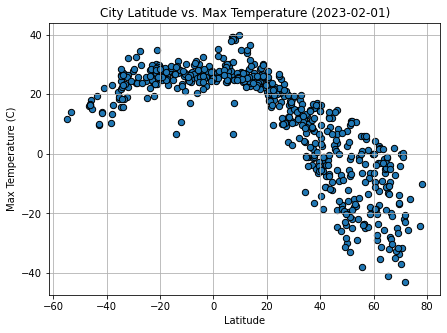

In [29]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-02-01)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

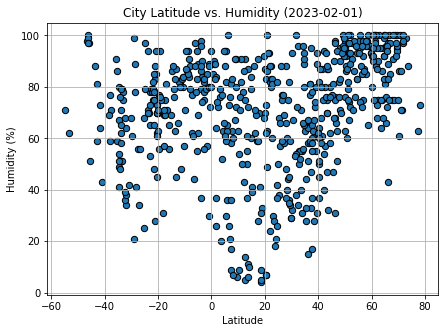

In [30]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-01)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

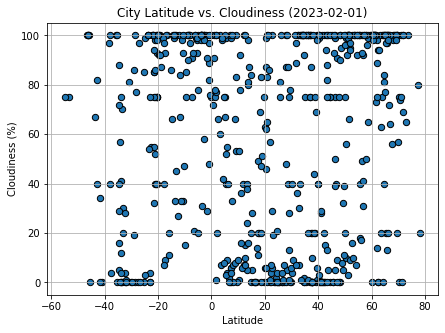

In [31]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-01)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

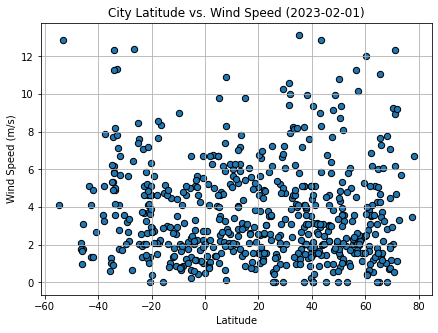

In [32]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-01)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def lin_reg_plot(data, x, y, x_label, y_label, title, fig_num, x_ann=0, y_ann=0):
    # Calculates regression and outputs values to variables
    slope, intercept, r_val, p_val, std_err = linregress(data[x], data[y])
    
    # Prints the r value
    print(f"The r-value is: {r_val}")
    
    # Calculates the regression line
    regress_values = data[x] * slope + intercept
    # Sets up a string with the line equation for plotting
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Plots the data
    plt.scatter(x=data[x], y=data[y], marker='o', s=40, color='blue', alpha=0.7)

    # Incorporates the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Plots the regression line
    plt.plot(data[x], regress_values, 'r-')
    # Annotates the plot with the equation of the regression line
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red", annotation_clip=False)  
    
    # Saves the figure to a png file and puts it into the output data file
    plt.savefig(f"output_data/Fig{fig_num}.png")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,morbegno,46.1383,9.5700,14.58,31,5,2.72,IT,1675260079
1,severo-kurilsk,50.6789,156.1250,-5.48,60,92,4.85,RU,1675259969
2,tura,25.5198,90.2201,17.30,38,0,0.54,IN,1675260081
3,beni suef,29.0731,31.0979,17.46,36,28,10.27,EG,1675260081
5,guatire,10.4762,-66.5427,27.61,54,1,1.69,VE,1675259805


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port alfred,-33.5906,26.8910,23.43,79,70,4.92,ZA,1675259865
6,lebu,-37.6167,-73.6500,16.36,71,4,7.86,CL,1675259826
7,rikitea,-23.1203,-134.9692,25.69,78,4,7.11,PF,1675259881
9,chuy,-33.6971,-53.4616,27.12,62,41,4.99,UY,1675259776
10,punta arenas,-53.1500,-70.9167,14.01,62,75,12.86,CL,1675260085


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8569772692306384


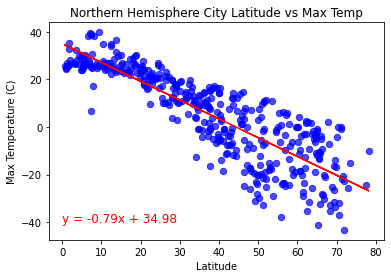

In [15]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Max Temp', "Latitude", "Max Temperature (C)", "Northern Hemisphere City Latitude vs Max Temp", 5, 0, -40)


The r-value is: 0.4882056025000696


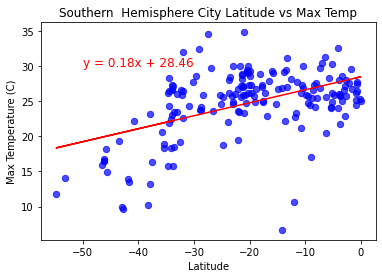

In [17]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Max Temp', "Latitude", "Max Temperature (C)", "Southern  Hemisphere City Latitude vs Max Temp", 6, -50, 30)


**Discussion about the linear relationship:** The latitude of the northern hemisphere cities is strongly negatively correlated with max temp, with a regression coefficient of -0.86. This means the closer a city is to the equator, the warmer it gets (though the max temp plateaus around 25 C). The latitude of the southern hemisphere cities is weakly positively correlated with max temp, with a regression coefficient of 0.49. This means that the northern trend holds true for the south, with latitudes closer to the equator having higher max temps, but the relationship is less strong for the southern hemisphere cities. This could be due to there being more northern hemisphere cities in this particular dataset, and the northern cities covering a wider range of latitudes than the southern. This could also be due to the fact that the northern cities cover a much wider range of max temperatures (~-45C to 40C for the northern, compared to ~10C to 35C for the southern).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4536100567751565


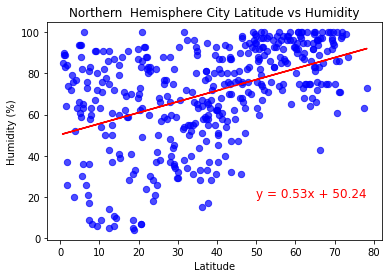

In [23]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Humidity', "Latitude", "Humidity (%)", "Northern  Hemisphere City Latitude vs Humidity", 7, 50, 20)


The r-value is: 0.4882056025000696


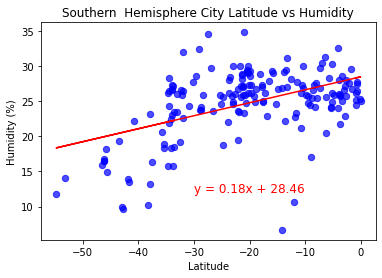

In [24]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Max Temp', "Latitude", "Humidity (%)", "Southern  Hemisphere City Latitude vs Humidity", 8, -30, 12)


**Discussion about the linear relationship:** Both northern and southern hemisphere city latitudes are weakly positively correlated to humidity, with r-values of 0.45 and 0.49 respectively. This means that in general the further north a city is located, the more humid that city is though there are exceptions given the weak strength of the correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3055011494510044


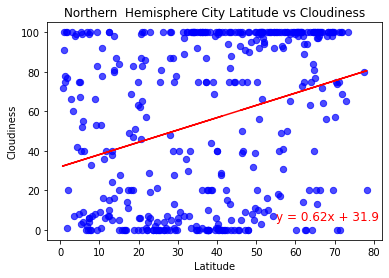

In [25]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Cloudiness', "Latitude", "Cloudiness", "Northern  Hemisphere City Latitude vs Cloudiness", 9, 55, 5)


The r-value is: 0.3683417760387324


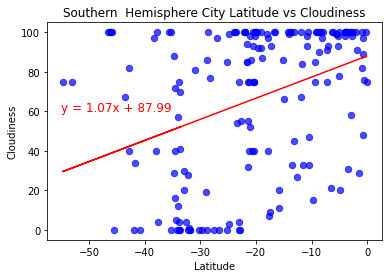

In [26]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Cloudiness', "Latitude", "Cloudiness", "Southern  Hemisphere City Latitude vs Cloudiness", 10, -55, 60)


**Discussion about the linear relationship:** The longitude of a city is weakly positively correlated with its cloudiness in both hemispheres, with r-values of 0.31 for the northern hemisphere and 0.37 for the southern hemisphere. This means that in general the further north a city is located the cloudier it is, though there are many exceptions given the weak correlation (as is apparent on the graphs).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03176449503322882


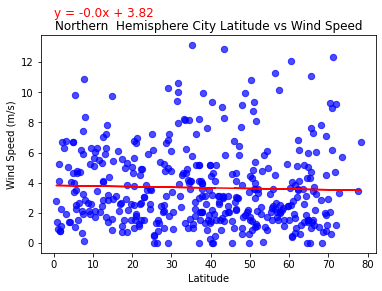

In [27]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df, 'Lat', 'Wind Speed', "Latitude", "Wind Speed (m/s)", "Northern  Hemisphere City Latitude vs Wind Speed", 11, 0, 15)


The r-value is: -0.2691161587948617


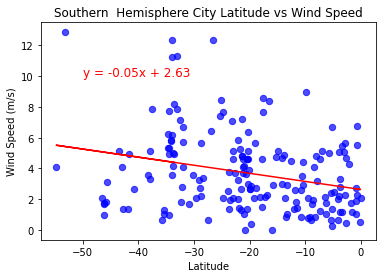

In [28]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df, 'Lat', 'Wind Speed', "Latitude", "Wind Speed (m/s)", "Southern  Hemisphere City Latitude vs Wind Speed", 12, -50, 10)


**Discussion about the linear relationship:** The wind speed of the cities is not correlated with longitude, with a r-value of -0.032 for the northern hemisphere cities and -0.27 for the southern hemisphere cities. The southern dataset is closer to being a significant correlation than the northern dataset, however this may be due to better coverage of northern hemisphere cities in this dataset. 